**Problem Statement**

In this part, we will learn how to predict the stability of the power grid based on attribute information.

**Attribute Information:**
1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.
4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
5. stabf: the stability label of the system (categorical: stable/unstable)

In [1]:
# import suitable library
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
!unzip 'grid_data.csv.zip'

Archive:  grid_data.csv.zip
 extracting: grid_data.csv           


In [4]:
# load dataset
df = pd.read_csv('grid_data.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


# **Exploration**

In [5]:
print("Shape of dataframe", df.shape)

Shape of dataframe (10000, 14)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
# checking information data
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [8]:
# checking null
df.isnull().sum()/df.shape[0]

tau1     0.0
tau2     0.0
tau3     0.0
tau4     0.0
p1       0.0
p2       0.0
p3       0.0
p4       0.0
g1       0.0
g2       0.0
g3       0.0
g4       0.0
stab     0.0
stabf    0.0
dtype: float64

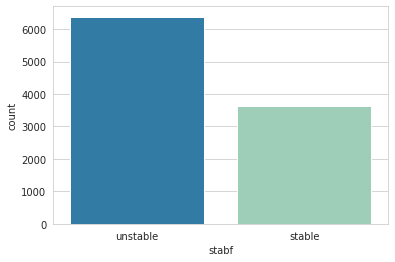

In [10]:
# counting data
sns.set_style('whitegrid')
sns.countplot(x='stabf', data=df, palette='YlGnBu_r');

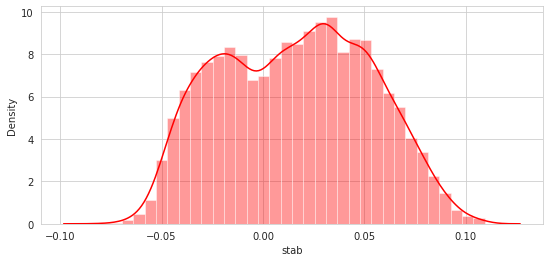

In [11]:
# distribution data observation
plt.figure(figsize=(9,4))
sns.distplot(df['stab'], color='r');

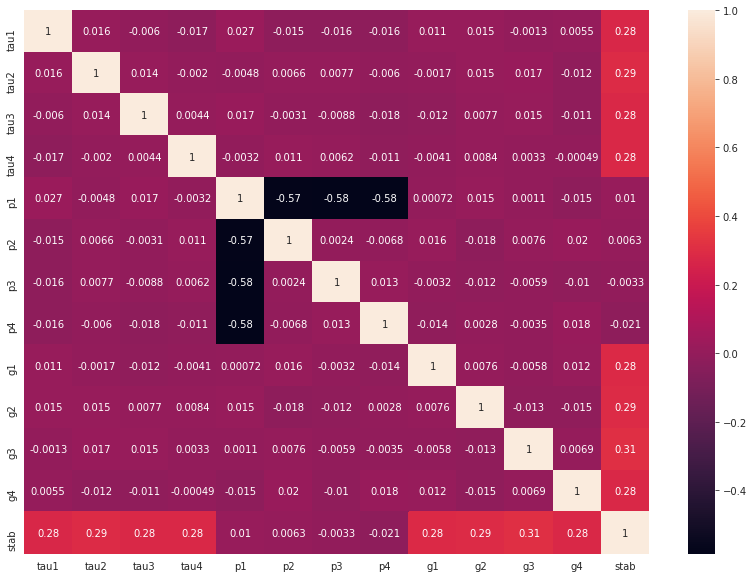

In [12]:
# correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True);

# **Modelling**

In [13]:
# Splitting dataset
X = df.drop(['stab', 'stabf'], axis=1)
y = df['stab']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=11)

In [14]:
# scaling dataset
import joblib
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#SAVING
joblib.dump(scaler, 'Scaler.joblib')

['Scaler.joblib']

In [15]:
# Building model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, random_state=11)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=11, verbose=0, warm_start=False)

In [16]:
# Prediction Step
y_pred = model.predict(X_test)

In [18]:
# Evaluating model
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rsq = model.score(X_test,y_test)
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('RSQ:', rsq)

Mean Absolute Error: 0.009026037650320777
Mean Squared Error: 0.00013792688783798235
Root Mean Squared Error: 0.011744227851927191
RSQ: 0.8965602132028349


In [19]:
# Saving model
import pickle
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [20]:
with open('model.pickle', 'rb') as f:
    clf = pickle.load(f)
type(clf)

sklearn.ensemble._forest.RandomForestRegressor

In [22]:
scaler=joblib.load('Scaler.joblib')

In [23]:
# Function prediction
from sklearn.preprocessing import StandardScaler

def check_stable(t1, t2, t3, t4, p1, p2, p3, p4, g1, g2, g3, g4):
    X_test = scaler.transform([[t1, t2, t3, t4, p1, p2, p3, p4, g1, g2, g3, g4]])
    prediction = clf.predict(X_test)
    print(prediction)
    if prediction>=0:
        return "Oops! the system is linearly unstable."
    else:
        return "Great! the system is stable."

In [24]:
# TESTING 1
check_stable(4.689852, 4.007747, 1.478573, 3.733787, 
             4.041300, -1.410344, -1.238204, -1.392751, 
             0.269708, 0.250364, 0.164941, 0.482439)

[-0.03641024]


'Great! the system is stable.'

In [25]:
# TESTING 2
check_stable(2.042954, 8.514335, 8.173809, 5.466635, 
             3.783797, -1.639912,-0.662469, -1.481417, 
             0.154129, 0.944486, 0.053225, 0.499109)

[0.0261817]


'Oops! the system is linearly unstable.'